In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


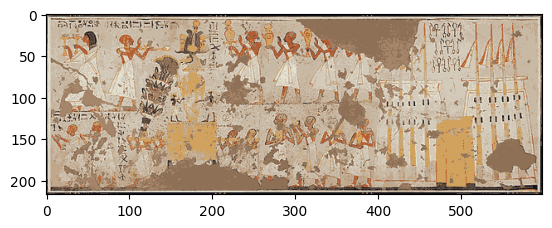

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('drive/MyDrive/met_data/facsimiles/test/557815.jpg')

# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# number of clusters (K)
k = 10
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

orig_labels = labels

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

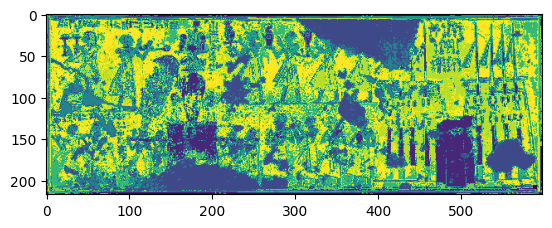

In [ ]:
plt.figure()
plt.imshow(labels.reshape(image.shape[0], image.shape[1]))

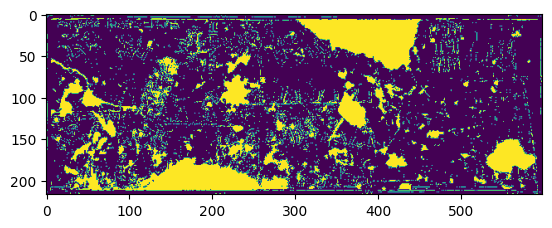

In [ ]:
mask = np.zeros_like(labels, dtype = 'uint8')


mask[(labels.flatten() == 1) | (labels.flatten() == 7)] = True

mask = mask.reshape((image.shape[0], image.shape[1]))

plt.figure()
plt.imshow(mask)

In [ ]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

# closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel1)

opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel2)

error: ignored

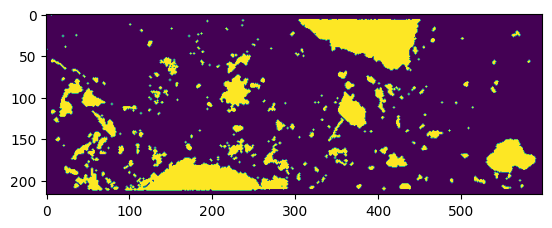

In [ ]:
plt.figure()
plt.imshow(opening)

In [ ]:
from PIL import Image

mask_img = Image.fromarray(opening*255)

mask_img.save('drive/MyDrive/met_data/facsimiles/masks/557815_mask.jpg')

In [3]:
# patch mask and corresponding image
from PIL import Image

# Open the image file
mask_im = Image.open('drive/MyDrive/met_data/facsimiles/masks/557815_mask.jpg')
im = Image.open('drive/MyDrive/met_data/facsimiles/test/557815.jpg')

# Define the dimensions of each sub-image
width, height = im.size
sub_width = width // 3
sub_height = height // 2

# Loop through each sub-image and save it to disk
for row in range(2):
    for col in range(3):
        # Define the region of interest (ROI) for this sub-image
        left = col * sub_width
        upper = row * sub_height
        right = left + sub_width
        lower = upper + sub_height
        roi = (left, upper, right, lower)

        # Crop the sub-image from the original image
        sub_image = im.crop(roi)
        sub_mask = mask_im.crop(roi)

        # Save the sub-image to disk with a unique filename
        mask_filename = "drive/MyDrive/met_data/facsimiles/masks/557815_{}_{}.jpg".format(row, col)
        sub_mask.save(mask_filename)

        im_filename = "drive/MyDrive/met_data/facsimiles/test/557815_{}_{}.jpg".format(row, col)
        sub_image.save(im_filename)